In [76]:
import pandas as pd
df = pd.read_csv("./Data/FilterNbinarysystem.csv")
df.tail()

,System,SpT,Pday,Vmag,BmV,logM,logMe,logR,logRe,logg,...,logT,logTe,logL,logLe,Mass[solMass],log.Teff [K],B-V,Absolute Mag,SpType,Temp(log)
541,V478_Cyg-2,O9.5_III,2.881,8.63,-0.29,1.1767,0.0101,0.8543,0.0055,3.907,...,4.502,0.008,4.670,0.04,15.021040,4.502,-0.29,-6.875,O,0.653405
542,EM_Car-1,O7.5_V((f)),) 3.414,8.38,-0.31,1.3596,0.0061,0.9708,0.0079,3.856,...,4.531,0.026,5.020,0.10,22.887587,4.531,-0.31,-7.750,O,0.656194
543,EM_Car-2,O7.5_V((f),) 3.414,8.38,-0.31,1.3310,0.0067,0.9212,0.0073,3.926,...,4.531,0.026,4.920,0.10,21.428906,4.531,-0.31,-7.500,O,0.656194
544,KOI-126_BC-1,M,1.722,14.00,1.70,-0.6286,0.0011,-0.5943,0.0014,4.998,...,3.510,0.005,-2.194,0.02,0.235180,3.510,1.70,10.285,M,0.545307
545,KOI-126_BC-2,M,1.722,14.00,1.70,-0.6834,0.0013,-0.6354,0.0013,5.026,...,3.501,0.005,-2.312,0.02,0.207300,3.501,1.70,10.580,M,0.544192


In [78]:
import numpy as np
df['R'] = 10**df['logR']
df['vol'] = (4/3*(np.pi*(df['R']**3)))
df['rho'] = df['Mass[solMass]'] / df['vol']
df.info()
df.tail()
#M / (4/3 * π * R³)
df['rho'].max()
df['rho'].min()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   System         546 non-null    object 
 1   SpT            546 non-null    object 
 2   Pday           546 non-null    object 
 3   Vmag           546 non-null    float64
 4   BmV            546 non-null    float64
 5   logM           546 non-null    float64
 6   logMe          546 non-null    float64
 7   logR           546 non-null    float64
 8   logRe          546 non-null    float64
 9   logg           546 non-null    float64
 10  logge          546 non-null    float64
 11  logT           546 non-null    float64
 12  logTe          546 non-null    float64
 13  logL           546 non-null    float64
 14  logLe          546 non-null    float64
 15  Mass[solMass]  546 non-null    float64
 16  log.Teff [K]   546 non-null    float64
 17  B-V            546 non-null    float64
 18  Absolute M

3.763668729335384e-06

In [79]:
df2 = pd.read_csv("./Data/data_sample_mass_radius.csv")
df2['logL'] = np.log10(df2['L'])
df2['logR'] = np.log10(df2['R'])
df2['logT'] = np.log10(df2['Teff'])
df2.to_csv("./Data/data_sample_mass_radius.csv", index=False)

df2['Teff'].max()

12000

In [80]:
RM1=df[['Mass[solMass]', 'logT', 'SpT', 'rho', 'logg', 'logL', 'logR']]
RM1 = RM1.rename(columns={'Mass[solMass]': 'M', 'logTe': 'logT', 'SpT': 'type', 'rho': 'rho', 'logg': 'logg', 'logL': 'logL', 'logR': 'logR'})
RM1.info()

RM2 = df2[['M','logT', 'type', 'rho', 'logg', 'logL', 'logR']]
RM2.info()
RMM = pd.concat([RM1, RM2], ignore_index=True)
RMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       546 non-null    float64
 1   logT    546 non-null    float64
 2   type    546 non-null    object 
 3   rho     546 non-null    float64
 4   logg    546 non-null    float64
 5   logL    546 non-null    float64
 6   logR    546 non-null    float64
dtypes: float64(6), object(1)
memory usage: 30.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       934 non-null    float64
 1   logT    934 non-null    float64
 2   type    934 non-null    object 
 3   rho     630 non-null    float64
 4   logg    840 non-null    float64
 5   logL    917 non-null    float64
 6   logR    934 non-null    float64
dtypes: float64(6), object(1)
memory usage: 51.2+ KB
<class 'pandas.core.

In [81]:
RMM['type'] = RMM['type'].astype(str)
RMM = RMM[RMM['type'] != 'n']
RMM['type'] = RMM['type'].str[0]
RMM['type'].unique()


array(['M', 'K', 'n', 'G', 'F', 'A', 'B', 'O'], dtype=object)

In [82]:
RMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       1480 non-null   float64
 1   logT    1480 non-null   float64
 2   type    1480 non-null   object 
 3   rho     1176 non-null   float64
 4   logg    1386 non-null   float64
 5   logL    1463 non-null   float64
 6   logR    1480 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


In [83]:
spectral_type_mapping = {
    "O": 0,
    "B": 1,
    "A": 2,
    "F": 3,
    "G": 4,
    "K": 5,
    "M": 6,
}
RMM["SNtype"] = RMM["type"].map(spectral_type_mapping)
RMM.head()
RMM.isna().sum()

M           0
logT        0
type        0
rho       304
logg       94
logL       17
logR        0
SNtype     85
dtype: int64

In [85]:
RMM.dropna(inplace=True)
RMM.isna().sum()
RMM.to_csv('./Data/DensityMass.csv')

ValueError: could not convert string to float: 'M'

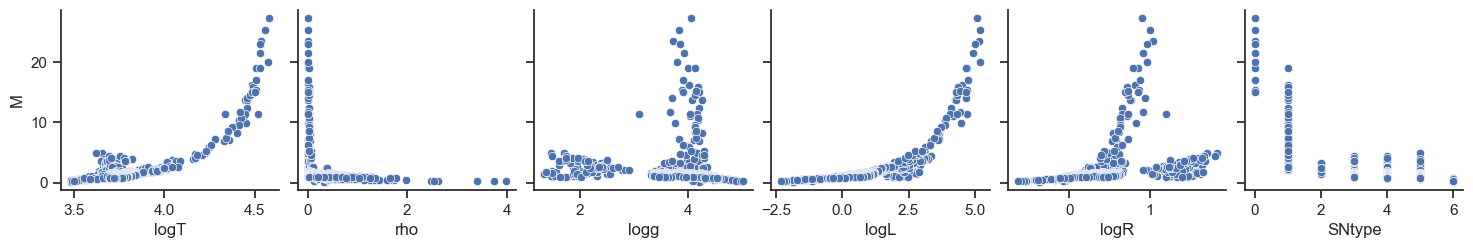

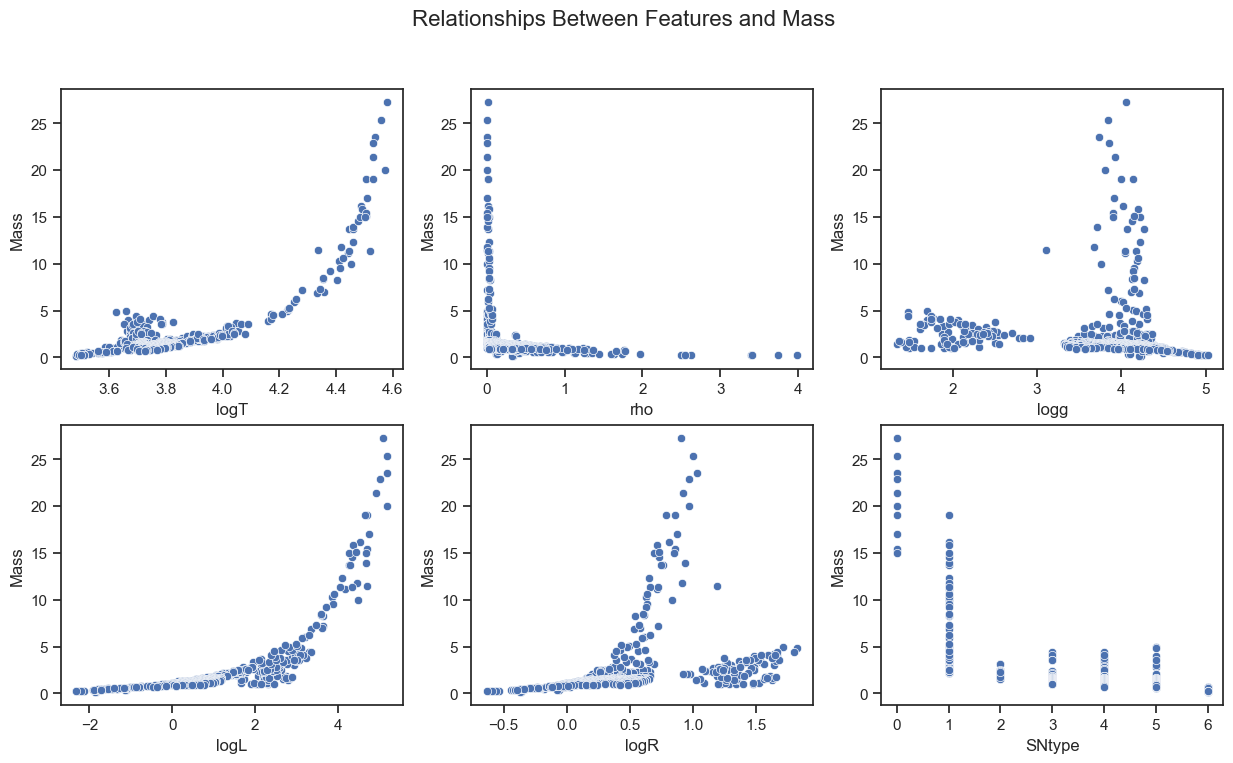

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
sns.pairplot(RMM, x_vars=['logT', 'rho', 'logg', 'logL', 'logR', 'SNtype'], y_vars='M', kind='scatter', diag_kind='kde')

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Relationships Between Features and Mass", fontsize=16)

features = ['logT', 'rho', 'logg', 'logL', 'logR', 'SNtype']

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.scatterplot(x=feature, y='M', data=RMM, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Mass')

corr_matrix = RMM.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

plt.show()


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Y = RMM['M']  
X = RMM[['logT', 'rho', 'logg', 'logL', 'logR', 'SNtype']]  # Features

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
bayesian_ridge = BayesianRidge()
random_forest = RandomForestRegressor()
k_neighbors = KNeighborsRegressor()
decision_tree = DecisionTreeRegressor()
svr = SVR()

linear_reg.fit(X_train, Y_train)
bayesian_ridge.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
k_neighbors.fit(X_train, Y_train)
decision_tree.fit(X_train, Y_train)
svr.fit(X_train, Y_train)

linear_reg_pred = linear_reg.predict(X_test)
bayesian_ridge_pred = bayesian_ridge.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
k_neighbors_pred = k_neighbors.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
svr_pred = svr.predict(X_test)

def evaluate_model(model, predictions, Y_test):
    mse = mean_squared_error(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    return mse, mae, r2

linear_reg_mse, linear_reg_mae, linear_reg_r2 = evaluate_model(linear_reg, linear_reg_pred, Y_test)
bayesian_ridge_mse, bayesian_ridge_mae, bayesian_ridge_r2 = evaluate_model(bayesian_ridge, bayesian_ridge_pred, Y_test)
random_forest_mse, random_forest_mae, random_forest_r2 = evaluate_model(random_forest, random_forest_pred, Y_test)
k_neighbors_mse, k_neighbors_mae, k_neighbors_r2 = evaluate_model(k_neighbors, k_neighbors_pred, Y_test)
decision_tree_mse, decision_tree_mae, decision_tree_r2 = evaluate_model(decision_tree, decision_tree_pred, Y_test)
svr_mse, svr_mae, svr_r2 = evaluate_model(svr, svr_pred, Y_test)

print("Linear Regression:")
print(f"Mean Squared Error: {linear_reg_mse}")
print(f"Mean Absolute Error: {linear_reg_mae}")
print(f"R-squared: {linear_reg_r2}\n")

print("Bayesian Ridge:")
print(f"Mean Squared Error: {bayesian_ridge_mse}")
print(f"Mean Absolute Error: {bayesian_ridge_mae}")
print(f"R-squared: {bayesian_ridge_r2}\n")

print("Random Forest:")
print(f"Mean Squared Error: {random_forest_mse}")
print(f"Mean Absolute Error: {random_forest_mae}")
print(f"R-squared: {random_forest_r2}\n")

print("K-Neighbors:")
print(f"Mean Squared Error: {k_neighbors_mse}")
print(f"Mean Absolute Error: {k_neighbors_mae}")
print(f"R-squared: {k_neighbors_r2}\n")

print("Decision Tree:")
print(f"Mean Squared Error: {decision_tree_mse}")
print(f"Mean Absolute Error: {decision_tree_mae}")
print(f"R-squared: {decision_tree_r2}\n")

print("Support Vector Regressor:")
print(f"Mean Squared Error: {svr_mse}")
print(f"Mean Absolute Error: {svr_mae}")
print(f"R-squared: {svr_r2}")


Linear Regression:
Mean Squared Error: 0.7855372236888771
Mean Absolute Error: 0.571122127639806
R-squared: 0.8036328087449103

Bayesian Ridge:
Mean Squared Error: 0.7806905385792816
Mean Absolute Error: 0.5681572178765388
R-squared: 0.8048443744265464

Random Forest:
Mean Squared Error: 0.2745232793927086
Mean Absolute Error: 0.16279574256293342
R-squared: 0.9313751612490955

K-Neighbors:
Mean Squared Error: 0.25275510710648025
Mean Absolute Error: 0.16616281817153947
R-squared: 0.9368167300528375

Decision Tree:
Mean Squared Error: 0.29386756671097874
Mean Absolute Error: 0.19493212689725078
R-squared: 0.9265395108776439

Support Vector Regressor:
Mean Squared Error: 0.13166557112493024
Mean Absolute Error: 0.17135334780599332
R-squared: 0.9670864758446636


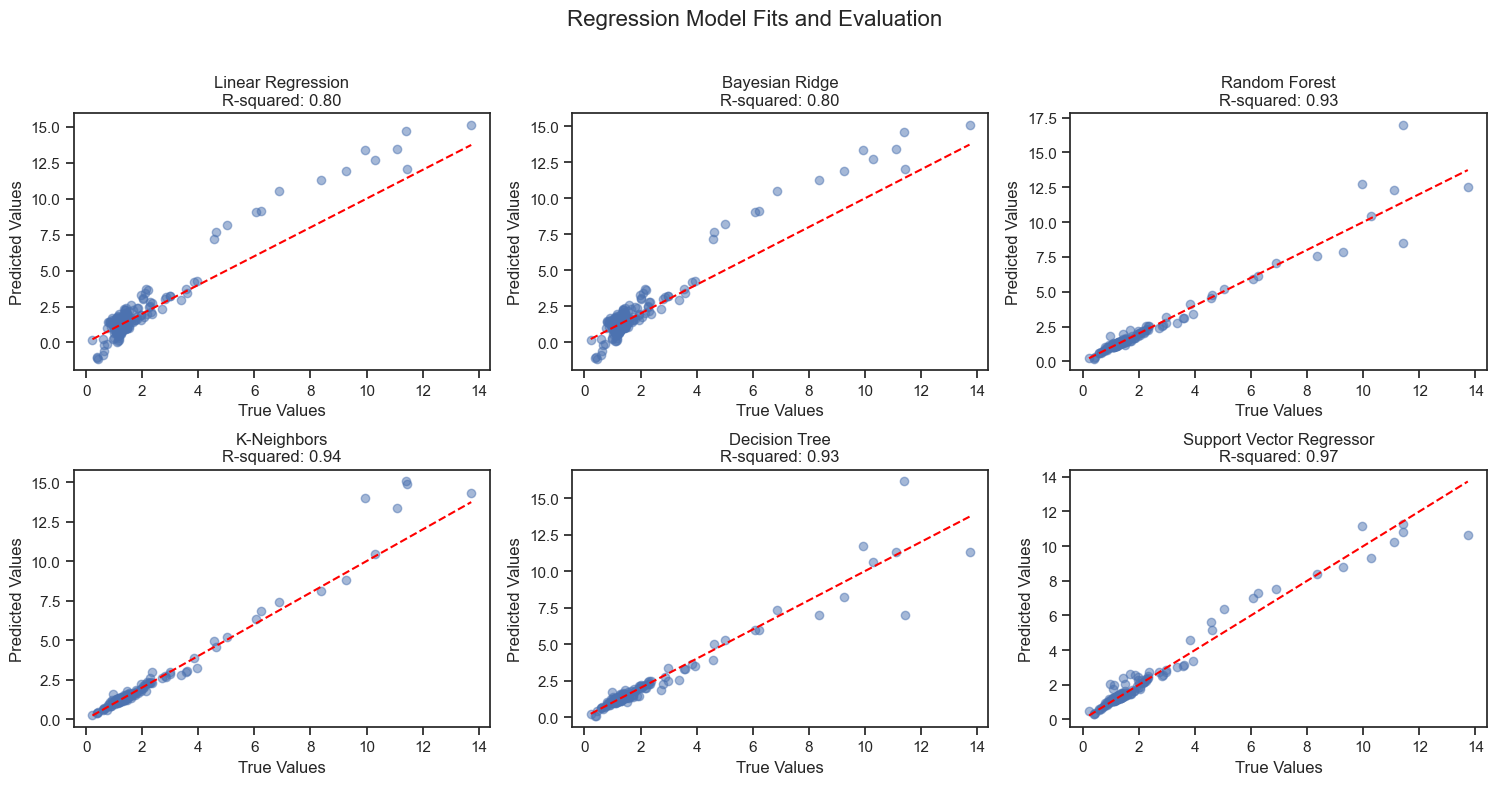

In [88]:
import matplotlib.pyplot as plt

models = ["Linear Regression", "Bayesian Ridge", "Random Forest", "K-Neighbors", "Decision Tree", "Support Vector Regressor"]
predictions = [linear_reg_pred, bayesian_ridge_pred, random_forest_pred, k_neighbors_pred, decision_tree_pred, svr_pred]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle("Regression Model Fits and Evaluation", fontsize=16)

for i, model_name in enumerate(models):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    ax.scatter(Y_test, predictions[i], alpha=0.5)
    ax.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(f"{model_name}\nR-squared: {evaluate_model([linear_reg, bayesian_ridge, random_forest, k_neighbors, decision_tree, svr][i], predictions[i], Y_test)[2]:.2f}")

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
